In [27]:
import enzope as ezp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### Distribucion de pesos uniforme

In [231]:
n_agents = 20000
w0 = np.random.rand(n_agents)
# w0 /= np.sum(w0)
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/5, w0=w0)
gtg.get_mean_connectivity()

15.372

In [232]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.7
        and gtg.G.nodes[node]['pos'][0] >= 0.3
        and gtg.G.nodes[node]['pos'][1] <= 0.7
        and gtg.G.nodes[node]['pos'][1] >= 0.3
    )
]
len(center_nodes)

3239

In [233]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((20000,), (3239,))

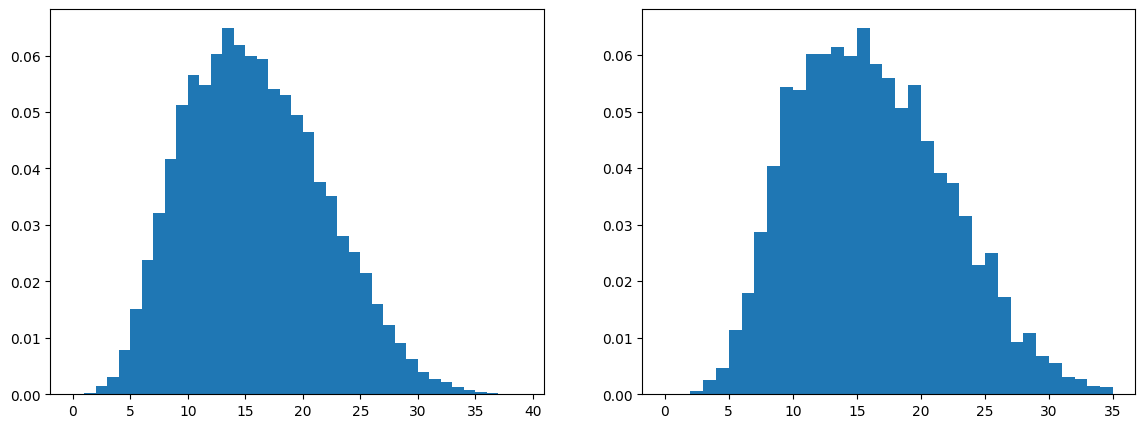

In [234]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

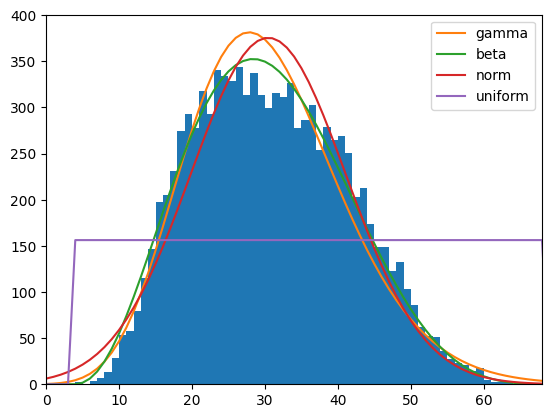

In [189]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['gamma', 'beta', 'norm', 'uniform']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()


### Para una distribucion de pesos exponencial:

In [235]:
n_agents = 20000
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/5)
gtg.get_mean_connectivity()

30.6268

In [236]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.7
        and gtg.G.nodes[node]['pos'][0] >= 0.3
        and gtg.G.nodes[node]['pos'][1] <= 0.7
        and gtg.G.nodes[node]['pos'][1] >= 0.3
    )
]
len(center_nodes)

3219

In [237]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((20000,), (3219,))

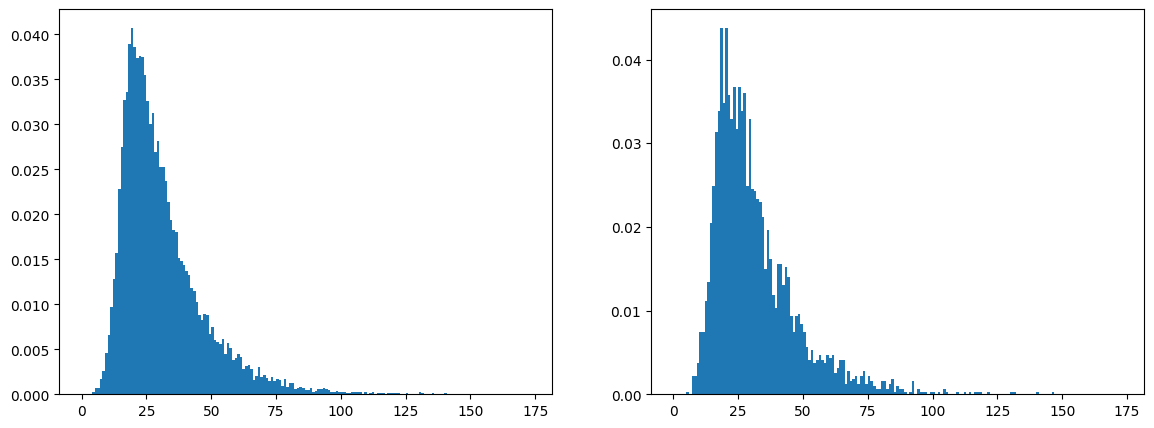

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

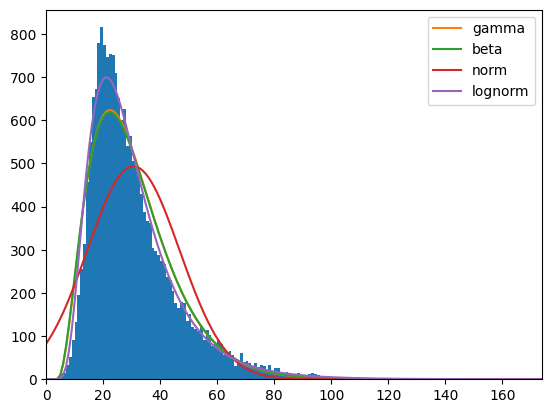

In [242]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['gamma', 'beta', 'norm', 'lognorm']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()
